In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2

In [7]:
from sqlalchemy import create_engine

In [8]:
DB_HOST = "localhost"
DB_NAME = "DB_USER = "DB_PASS = "DB_PORT = "5432"

In [9]:
engine = create_engine(f'postgresql://{DB_USER}:{DB_PASS}@{DB_HOST}:{DB_PORT}/{DB_NAME}')

In [10]:
def load_data(query):
    return pd.read_sql(query, engine)


In [11]:
df_clientes = load_data("SELECT * FROM clientes")
df_produtos = load_data("SELECT * FROM produtos")
df_pedidos = load_data("SELECT * FROM pedidos")
df_itens_pedido = load_data("SELECT * FROM itens_pedido")

In [12]:
print("Clientes:")
print(df_clientes.describe())
print("\nProdutos:")
print(df_produtos.describe())
print("\nPedidos:")
print(df_pedidos.describe())
print("\nItens do Pedido:")
print(df_itens_pedido.describe())

Clientes:
       id_cliente
count   15.000000
mean     8.000000
std      4.472136
min      1.000000
25%      4.500000
50%      8.000000
75%     11.500000
max     15.000000

Produtos:
       id_produto       preco
count    9.000000    9.000000
mean     5.000000  197.777778
std      2.738613   56.519417
min      1.000000  120.000000
25%      3.000000  150.000000
50%      5.000000  200.000000
75%      7.000000  250.000000
max      9.000000  270.000000

Pedidos:
       id_pedido    valor_total  id_cliente
count   50.00000      50.000000   50.000000
mean    25.50000   10873.800000    6.020000
std     14.57738   21730.513569    3.841184
min      1.00000     250.000000    1.000000
25%     13.25000    1300.000000    3.000000
50%     25.50000    5040.000000    5.000000
75%     37.75000    9030.000000    8.750000
max     50.00000  134400.000000   15.000000

Itens do Pedido:
          id_item   id_pedido  id_produto  quantidade  preco_unitario
count  112.000000  112.000000  112.000000  112.000000

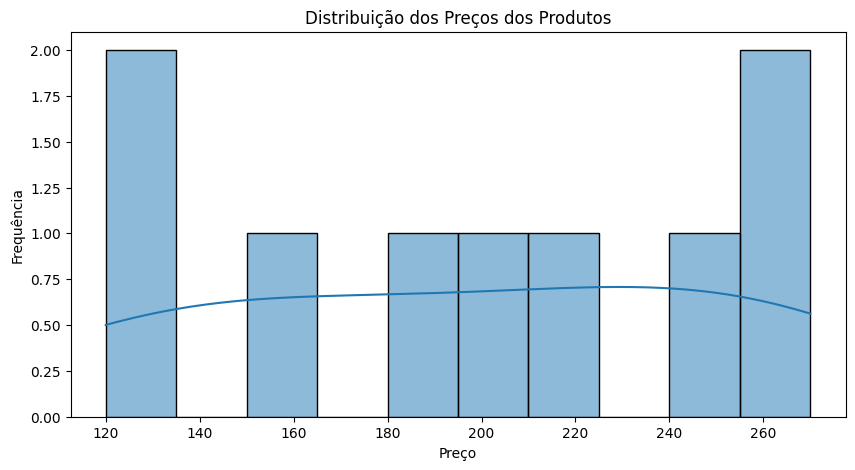

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(df_produtos['preco'], bins=10, kde=True)
plt.title("Distribuição dos Preços dos Produtos")
plt.xlabel("Preço")
plt.ylabel("Frequência")
plt.show()

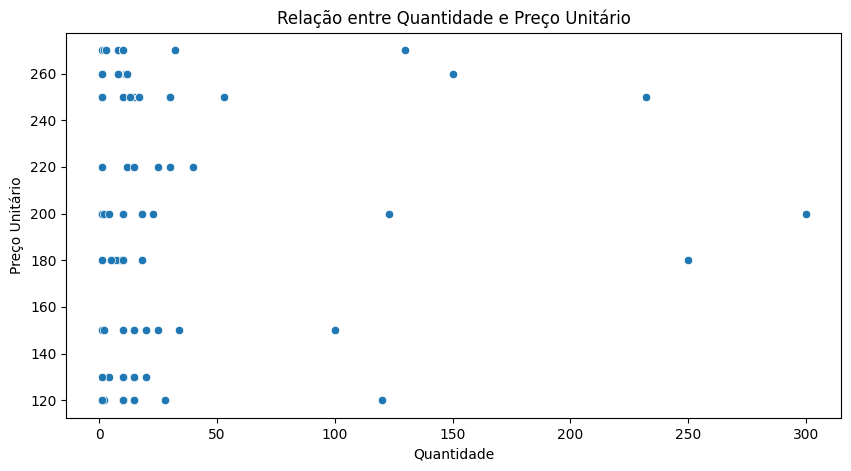

In [14]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_itens_pedido, x='quantidade', y='preco_unitario')
plt.title("Relação entre Quantidade e Preço Unitário")
plt.xlabel("Quantidade")
plt.ylabel("Preço Unitário")
plt.show()

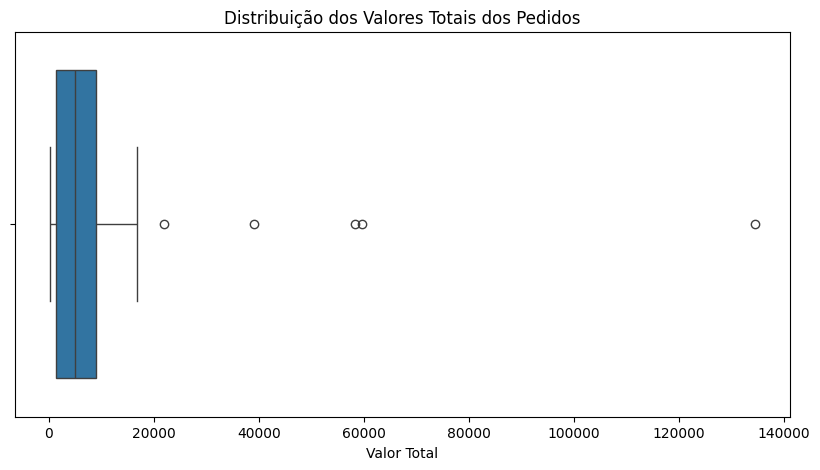

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_pedidos['valor_total'])
plt.title("Distribuição dos Valores Totais dos Pedidos")
plt.xlabel("Valor Total")
plt.show()
